##Table of content


1.   Objective
2.   Loading Data
3.   Exploratory Data Analysis
4.   Data Preparation (NLP)
5.   LSTM Model
6.   Evaluate the model and make predictions
7.   Save model



# 1. Objective

Building LSTM model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of ~10,000 tweets that were hand classified.

#2. Loading Data 


In [ ]:
# Import Liabriries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Matplot & Seaborn
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)


# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import (LSTM, 
                          Activation,
                          Conv1D,
                          MaxPooling1D,
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.initializers import Constant
from tensorflow.keras import optimizers

# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

# Warnings
import warnings 
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Socket
from socket import socket

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data  = pd.read_csv('/content/test.csv')

##Check head and info of the data

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [ ]:
test_data.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

###Data Description
id - a unique identifier for each tweet
text - the text of the tweet
location - the location the tweet was sent from (may be blank)
keyword - a particular keyword from the tweet (may be blank)
target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [ ]:
train_data.shape

(7613, 5)

In [ ]:
test_data.shape

(3263, 4)

In [ ]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


# 3. Exploratory Data Analysis

##Is there a missing data [how many and the precentage if there]?

In [ ]:
#Obtaning Missing data and the precentage of it
train_data.isnull().sum() / train_data.shape[0] * 100.00

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [ ]:
#Obtaning Missing data and the precentage of it
test_data.isnull().sum() / test_data.shape[0] * 100.00

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

Both training and test set have same ratio of missing values in keyword and location.

0.8% of keyword is missing in both training and test set 33% of location is missing in both training and test set Since missing value ratios between training and test set are too close, they are most probably taken from the same sample. Missing values in those features are filled with no_keyword and no_location respectively.


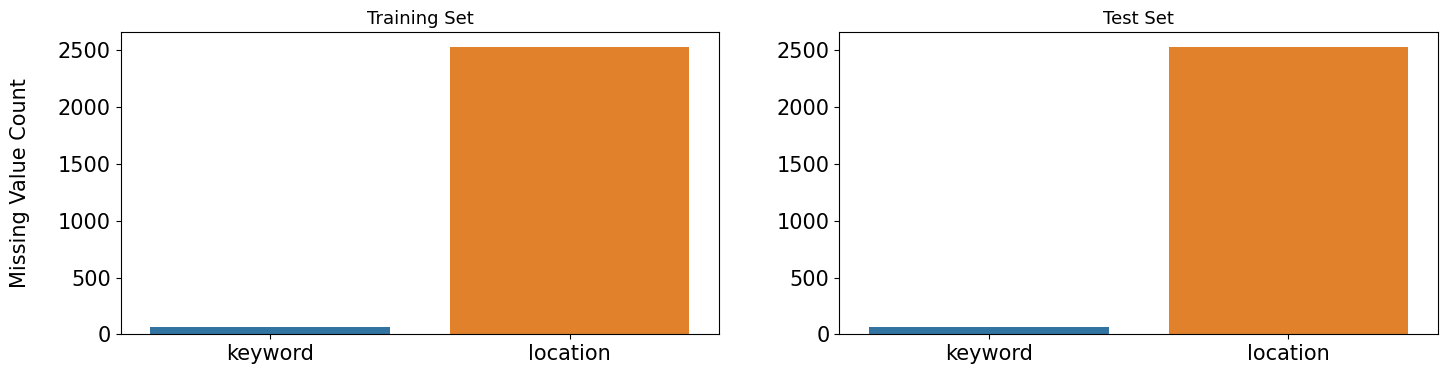

In [ ]:
# Handling of Missing data 
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()


for df in [train_data, test_data]:
    for col in ['keyword','location']:
        df[col] = df[col].fillna(f'no_{col}')


In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1


##How many data in each class?


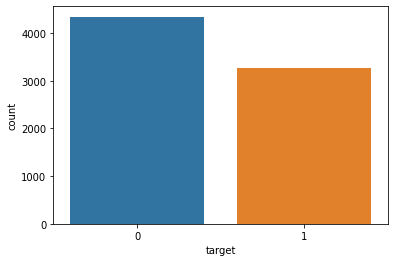

In [ ]:
# First method by (Target Variable Distribution)

# extracting the number of examples of each class
# Real_len = tweet[tweet['target'] == 1].shape[0]
# Not_len = tweet[tweet['target'] == 0].shape[0]
# # bar plot of the 3 classes
# plt.rcParams['figure.figsize'] = (7, 5)
# plt.bar(10, Real_len, 3, label="Real", color='blue')
# plt.bar(15, Not_len, 3, label="Not", color='orange')
# plt.legend()
# plt.ylabel('Number')
# plt.title('Proportion of tweets')
# plt.show()


# plot target
sns.countplot(x="target", data=train_data)

In [ ]:

colors = ['#87ace8','#e3784d']

fig = px.pie(train_data, names='target', height=600, width= 600, color_discrete_sequence=colors, title='Pie Chart for distribution of Tweets')
fig.update_traces(textfont_size=15)
fig.show()

Note:
From pervious bar and pie chart the data doesn't seems to be biased as there is fair distribution of disaster/non-disaster tweets data is given.

In [ ]:
#How many data in each class?
# second method by using value_counts()
dist_target=train_data['target'].value_counts()
dist_target

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
dist_id=train_data['id'].value_counts()
dist_id

1        1
7229     1
7250     1
7248     1
7247     1
        ..
3638     1
3637     1
3636     1
3635     1
10873    1
Name: id, Length: 7613, dtype: int64

In [ ]:
dist_location=train_data['location'].value_counts()
dist_location

no_location                     2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: location, Length: 3342, dtype: int64

In [ ]:
dist_keyword=train_data['keyword'].value_counts()
dist_keyword

no_keyword               61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [ ]:
dist_text=train_data['text'].value_counts()
dist_text

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
                                                                                                                                                ..
Escape The Heat (and the #ORShow) for a trail run on Desolation Loop you'll be glad you did http://t.co/n2ucNzh38P htt

##Get the top 15 locations of the data

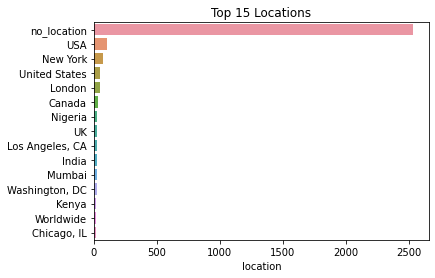

In [ ]:
# Get the top 15 locations of the data

locations_vc = train_data["location"].value_counts()
sns.barplot(y=locations_vc[0:15].index, x=locations_vc[0:15], orient='h')
plt.title("Top 15 Locations")
plt.show()


##Get the top 15 keyword in the data

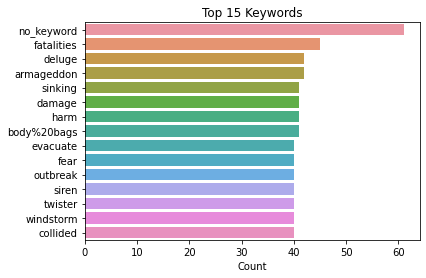

In [ ]:
#Get the top 15 keyword in the data

keywords_vc = pd.DataFrame({"Count": train_data["keyword"].value_counts()})
sns.barplot(y=keywords_vc[0:15].index, x=keywords_vc[0:15]["Count"], orient='h')
plt.title("Top 15 Keywords")
plt.show()

In [ ]:
# Number of characters in tweets
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
train_data['length'] = train_data['text'].apply(length)

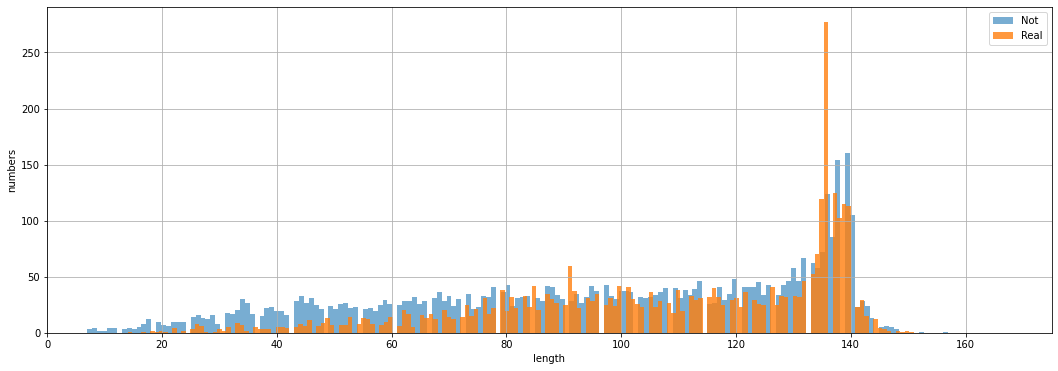

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 175
plt.hist(train_data[train_data['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train_data[train_data['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,175)
plt.grid()
plt.show()

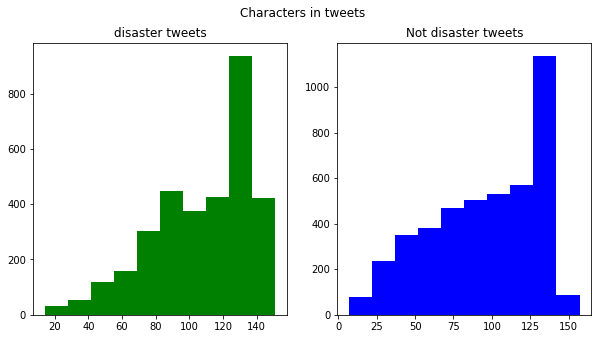

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
train_data_len=train_data[train_data['target']==1]['text'].str.len()
ax1.hist(train_data_len,color='green')
ax1.set_title('disaster tweets')
train_data_len=train_data[train_data['target']==0]['text'].str.len()
ax2.hist(train_data_len,color='blue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

NOTE: from pervious bar charts the distribution of both seems to be almost same.120 t0 140 characters in a tweet are the most common among both.

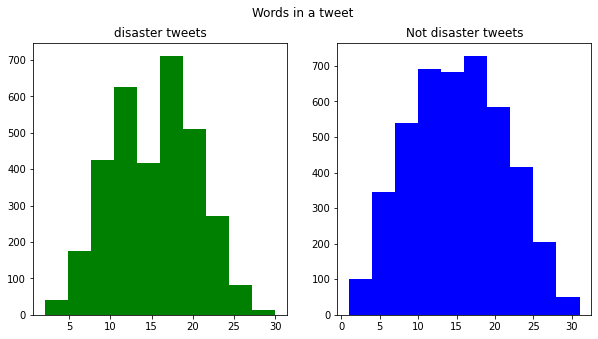

In [ ]:
# Number of words in a tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
train_data_len=train_data[train_data['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(train_data_len,color='green')
ax1.set_title('disaster tweets')
train_data_len=train_data[train_data['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(train_data_len,color='blue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

Text(0.5, 0.98, 'Average word length in each tweet')

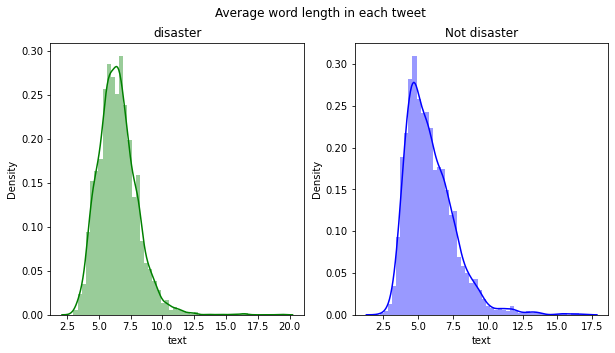

In [ ]:
#Average word length in a tweet

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_data[train_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('disaster')
word=train_data[train_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

##What are the most common words?

In [ ]:
from collections import defaultdict
def create_corpus(target):
    corpus=[]
    
    for x in train_data[train_data['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


In [ ]:
def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in train_data[train_data['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
from collections import Counter

words = train_data[train_data.target==0].text.apply(lambda x: [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
    h_words.update(text_)
    
print(h_words.most_common(50))

[('the', 1877), ('a', 1238), ('to', 1181), ('i', 1052), ('and', 911), ('of', 895), ('in', 805), ('you', 625), ('is', 586), ('my', 541), ('for', 486), ('on', 424), ('with', 374), ('-', 374), ('that', 357), ('it', 341), ('this', 286), ('be', 284), ('like', 250), ('have', 240), ('by', 240), ('so', 235), ('are', 231), ('at', 229), ('just', 229), ('your', 225), ('me', 221), ('was', 216), ('but', 216), ('not', 198), ("i'm", 195), ('&amp;', 190), ('??', 183), ('out', 179), ('up', 178), ('will', 177), ('if', 177), ('from', 177), ('all', 173), ('new', 163), ('get', 161), ('as', 160), ('or', 155), ('we', 148), ('when', 144), ('has', 143), ('he', 143), ('no', 140), ('about', 139), ('they', 133)]


In [ ]:
words = train_data[train_data.target==1].text.apply(lambda x: [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
    h_words.update(text_)
    
print(h_words.most_common(50))

[('the', 1330), ('in', 1144), ('of', 919), ('a', 897), ('to', 753), ('and', 494), ('on', 410), ('for', 394), ('-', 389), ('is', 344), ('at', 303), ('i', 284), ('by', 274), ('from', 243), ('with', 188), ('that', 181), ('after', 181), ('this', 177), ('as', 167), ('are', 166), ('was', 165), ('it', 163), ('fire', 151), ('have', 140), ('my', 130), ('over', 123), ('you', 121), ('more', 121), ('via', 117), ('up', 114), ('an', 113), ('be', 112), ('...', 106), ('&amp;', 105), ('has', 104), ('suicide', 103), ('who', 100), ('no', 99), ('disaster', 97), ('but', 95), ('police', 94), ('people', 93), ('been', 93), ('when', 93), ('killed', 92), ('like', 91), ('not', 90), ('california', 88), ('than', 85), ('just', 84)]


##What are the most common stop words?

In [ ]:
# Common stopwords in tweets

#First we will analyze tweets with class 0
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15]

In [ ]:
## displaying the stopwords with class 0
np.array(top)

array([['the', '1524'],
       ['a', '1115'],
       ['to', '1099'],
       ['I', '938'],
       ['and', '840'],
       ['of', '834'],
       ['in', '720'],
       ['you', '529'],
       ['is', '512'],
       ['for', '452'],
       ['my', '442'],
       ['on', '387'],
       ['-', '374'],
       ['with', '349'],
       ['that', '326']], dtype='<U21')

<BarContainer object of 15 artists>

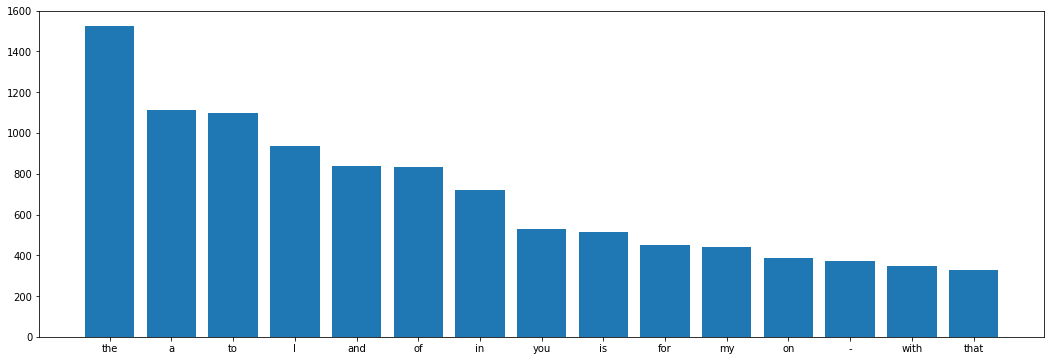

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 15 artists>

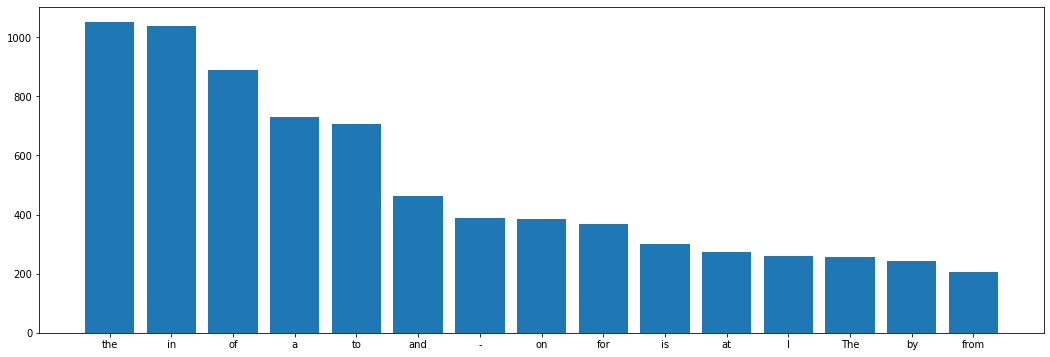

In [ ]:
#Now,we will analyze tweets with class 1
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:

        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

In [ ]:
# displaying the stopwords with class 1
np.array(top)

array([['the', '1051'],
       ['in', '1037'],
       ['of', '888'],
       ['a', '730'],
       ['to', '706'],
       ['and', '462'],
       ['-', '389'],
       ['on', '386'],
       ['for', '368'],
       ['is', '302'],
       ['at', '273'],
       ['I', '259'],
       ['The', '257'],
       ['by', '244'],
       ['from', '206']], dtype='<U21')

NOTE: Lot of cleaning needed for data

#4. Data Preparation (NLP)

##Use nlp to prepare dataset [tokenization, pad sequence, etc.]

In [ ]:
# Expanding contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in train, test
train_data['text'] = train_data['text'].apply(lambda x:expand_contractions(x))

In [ ]:
# Cleaning text

def clean_text(text):
    text = text.lower()                                  # lower-case all characters
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return text

In [ ]:
train_data['text'] = train_data['text'].apply(clean_text)

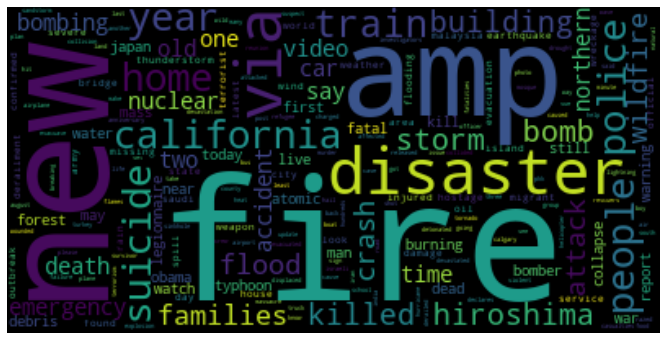

In [ ]:
# Word cloud of text in disaster and non-disaster tweets

# Cleaned dataframe of disaster
df_true = train_data[train_data.target == 1]

text_true = " ".join(txt for txt in df_true['text'])

text_cloud = WordCloud(collocations=False, background_color='black').generate(text_true)
plt.axis("off")
plt.imshow(text_cloud, interpolation='bilinear')

Words in disaster tweets: disaster, new, fire, via, year, suicide, police, home, dead, bombing, storm, etc.

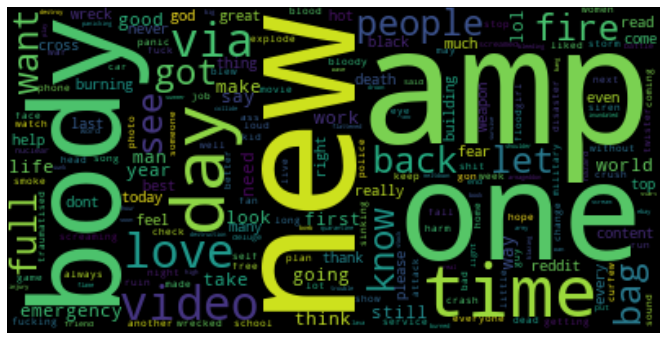

In [ ]:
# Cleaned dataframe of non-disaster
df_fake = train_data[train_data.target == 0]

text_fake = " ".join(txt for txt in df_fake['text'])

text_cloud = WordCloud(collocations=False, background_color='black').generate(text_fake)
plt.axis("off")
plt.imshow(text_cloud, interpolation='bilinear')

Words in non-disaster tweets: new, love, one, time, body, day, video, people, life, youtube, lol, etc.

In [ ]:
train_data.head()

,id,keyword,location,text,target,length
0,1,no_keyword,no_location,deeds reason earthquake may allah forgive,1,69
1,4,no_keyword,no_location,forest fire near ronge sask canada,1,38
2,5,no_keyword,no_location,residents asked ishelter place notified office...,1,133
3,6,no_keyword,no_location,people receive wildfires evacuation orders cal...,1,65
4,7,no_keyword,no_location,got sent photo ruby alaska smoke wildfires pou...,1,88


##Prepare train, test sets

In [ ]:
# Splitting independent and dependent variables

X = train_data['text']
y = train_data['target']

In [ ]:
# Splitting the dataset into train and test set

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.2, random_state=42)

##Tokenization
Converting sentences to sequences


In [ ]:
# Convert sentences to sequences

vocab_size = 1500
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_data)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train_data)
X_test = tokenizer.texts_to_sequences(X_test_data)

##Embedding Representation

Pad_Sequences
The pad_sequences() function in the Keras deep learning library can be used to pad variable length sequences. The default padding value is 0.0, which is suitable for most applications, although this can be changed by specifying the preferred value via the “value” argument.
By this we are going to make all the sentances in same length.There are 2 types of Padding "Pre" and "Post",pre means it's going to add 0 in front and post means it's goint add 0 in back

In [ ]:
max_length = 120

X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='pre')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='pre')

In [ ]:
y_train = np.array(y_train_data)
y_test = np.array(y_test_data)

#5. Bulid LSTM Model

In [ ]:
embedding_vector_features = 40

model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=120))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
h = model.fit(X_train_padded, y_train, validation_data=(X_test_padded,y_test), epochs=30, batch_size=64)

Epoch 1/30
96/96 [==============================] - 27s 222ms/step - loss: 0.6170 - accuracy: 0.6544 - val_loss: 0.4906 - val_accuracy: 0.7669
Epoch 2/30
96/96 [==============================] - 15s 157ms/step - loss: 0.4232 - accuracy: 0.8151 - val_loss: 0.4523 - val_accuracy: 0.7899
Epoch 3/30
96/96 [==============================] - 15s 157ms/step - loss: 0.3751 - accuracy: 0.8424 - val_loss: 0.4558 - val_accuracy: 0.7912
Epoch 4/30
96/96 [==============================] - 15s 157ms/step - loss: 0.3522 - accuracy: 0.8491 - val_loss: 0.4849 - val_accuracy: 0.7886
Epoch 5/30
96/96 [==============================] - 15s 157ms/step - loss: 0.3393 - accuracy: 0.8562 - val_loss: 0.4854 - val_accuracy: 0.7846
Epoch 6/30
96/96 [==============================] - 15s 159ms/step - loss: 0.3278 - accuracy: 0.8635 - val_loss: 0.4978 - val_accuracy: 0.7820
Epoch 7/30
96/96 [==============================] - 16s 169ms/step - loss: 0.3159 - accuracy: 0.8668 - val_loss: 0.5042 - val_accuracy: 0.7623

#6. Evaluate the model and make predictions

In [ ]:
model.evaluate(X_test_padded, y_test)

48/48 [==============================] - 1s 28ms/step - loss: 1.1073 - accuracy: 0.7439


[1.107268214225769, 0.743926465511322]

In [ ]:
y_pred=model.predict(X_test_padded)
y_pred = y_pred.round()

In [ ]:
# Calculating accuracy

accuracy_score(y_test,y_pred)

0.7439264609323704

In [ ]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       874
           1       0.70      0.70      0.70       649

    accuracy                           0.74      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.74      0.74      0.74      1523



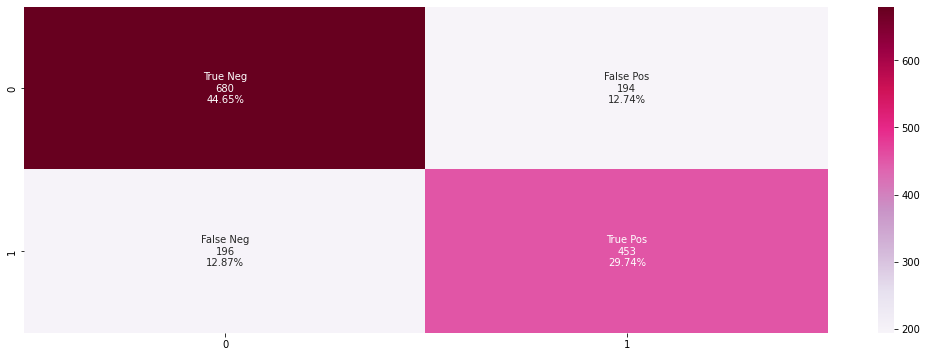

In [ ]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='PuRd')

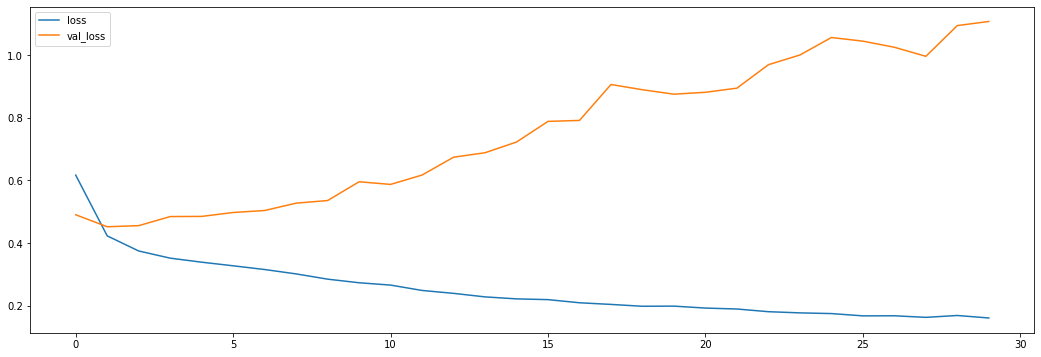

In [ ]:
# Plotting loss and val_loss

plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()

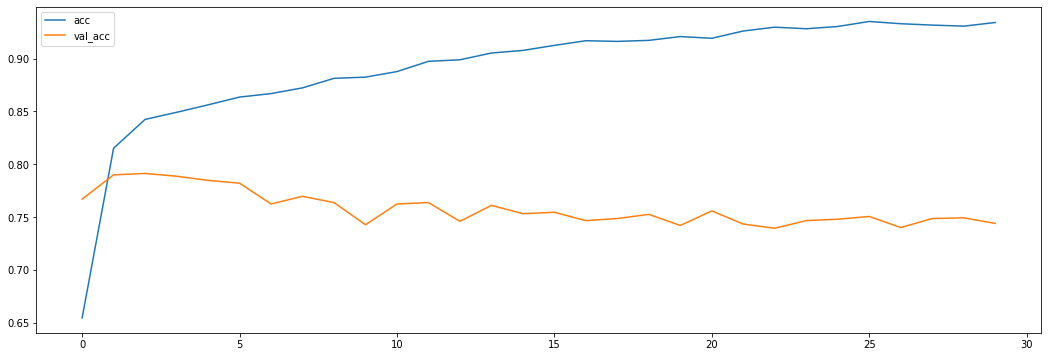

In [ ]:
# Plotting accuracy and val_accuracy

plt.plot(h.history['accuracy'], label='acc')
plt.plot(h.history['val_accuracy'], label='val_acc')
plt.legend()

#7. Saving model

In [ ]:
# loading library
import pickle

In [ ]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
# load saved model
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [ ]:
# check prediction

lr.predict([[200]]) # similar

array([[0.8840858]], dtype=float32)